In [13]:
import pandas as pd 
from sklearn.manifold import TSNE
import ast
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
import json
from sklearn.linear_model import LogisticRegression

In [2]:
def tsne_plot(emb, color_map, labels, n_comp=2):
    low_emb = TSNE(n_components=2).fit_transform(emb)
    plt.scatter(low_emb[:,0], low_emb[:,1], c = [color_map[y] for y in labels])
    plt.show()

## Visualizing doc2vec

In [4]:
doc2vec_dat = pd.read_csv('./data/embedded_doc2vec_imdb.csv', header=0, names=['text','label','embedding'], converters={"embedding": lambda x: [float(y) for y in (x.strip("[]").split(", "))]})
doc2vec_emb = doc2vec_dat.embedding.values
labels = doc2vec_dat.label.values
color_map = { 'positive':'red', 'negative':'green'}
en = {'positive':0, 'negative':1}
encoded_label = [en[y] for y in labels]

In [40]:
# doc2vec_dat = pd.read_csv('./data/embedded_doc2vec_bbc.csv', header =0, names=['text','label','embedding'], converters={"embedding": lambda x: [float(y) for y in (x.strip("[]").split(", "))]})
# doc2vec_emb = doc2vec_dat.embedding.values
# labels = doc2vec_dat.label.values
# color_map = { 'business':'red', 'entertainment':'green', 'politics':'blue', 'sport':'yellow','tech':'pink'}
# en = { 'business':0, 'entertainment':1, 'politics':2, 'sport':3,'tech':4}
# encoded_label = [en[y] for y in labels]

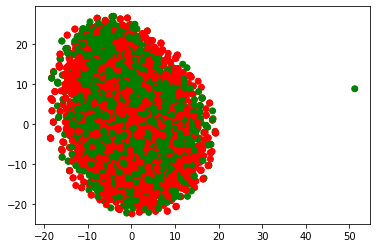

In [10]:
tsne_plot(doc2vec_emb.tolist()[:5000], color_map, labels[:5000])

In [14]:
model = LogisticRegression()
cv_doc2vec = cross_validate(model, doc2vec_emb.tolist(), encoded_label, cv=3)
print("Doc2Vec classification performance : \n", cv_doc2vec)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Doc2Vec classification performance : 
 {'fit_time': array([5.7323029 , 5.15830803, 4.04646969]), 'score_time': array([0.68231106, 0.25843191, 0.24770617]), 'test_score': array([0.78341733, 0.7775111 , 0.78219129])}


# Bayesian Paragraph vectors

In [41]:
import torch

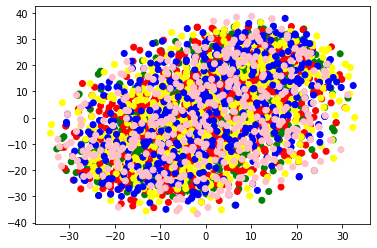

In [42]:
d_i = torch.load('di')
tsne_plot(d_i, color_map, labels)

In [43]:
cv_bpv = cross_validate(model, d_i.tolist(), encoded_label, cv=3)
print("BPV classification performance : \n", cv_bpv)

BPV classification performance : 
 {'fit_time': array([0.01393795, 0.01188397, 0.0111208 ]), 'score_time': array([0.25593495, 0.18306494, 0.18277311]), 'test_score': array([0.21130552, 0.22506739, 0.19459459])}
